# Fire Detection with Computer Vision

Data was collected to train a model to distinguish between the images that contain fire (fire images) and regular images (non-fire images), so the whole problem was binary classification.

Data is divided into 2 folders, fireimages folder contains 755 outdoor-fire images some of them contains heavy smoke, the other one is non-fireimages which contain 244 nature images (eg: forest, tree, grass, river, people, foggy forest, lake, animal, road, and waterfall).

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2 #OpenCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Activation, Flatten, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Load Data

Data can be found at: https://www.kaggle.com/phylake1337/fire-dataset

In [2]:
#mount google drive to import dataset stored in the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## EDA

In [3]:
fire_images_path = r"/content/drive/MyDrive/fire_dataset/fire_images"
non_fire_images_path = r"/content/drive/MyDrive/fire_dataset/non_fire_images"

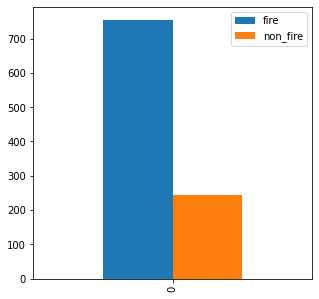

Count of Fire Images =  755
Count of Fire Images =  244


In [4]:
fire = len(os.listdir(fire_images_path))
non_fire = len(os.listdir(non_fire_images_path))

count = pd.DataFrame([[fire,non_fire]],columns=['fire','non_fire'])
count.plot(y=['fire','non_fire'], kind="bar", figsize=(5, 5))
plt.show()

print('Count of Fire Images = ', fire)
print('Count of Fire Images = ', non_fire)

### Visualize Data

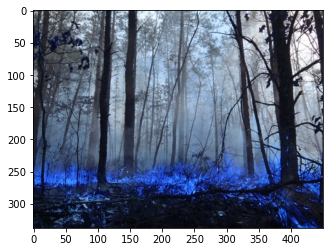

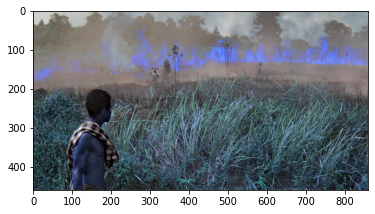

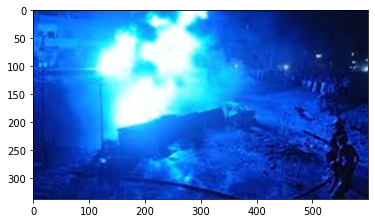

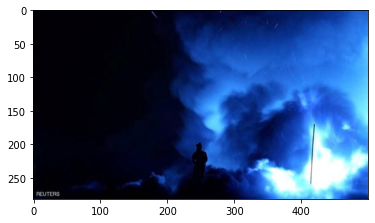

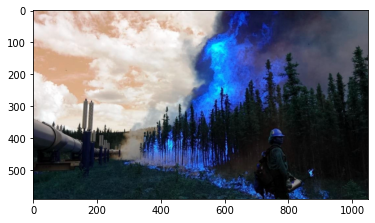

In [5]:
#Fire Images
for img in os.listdir(fire_images_path)[:5]:
  img_array = cv2.imread(os.path.join(fire_images_path,img))
  plt.imshow(img_array)
  plt.show()

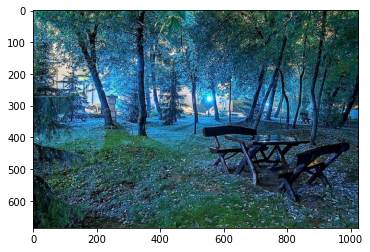

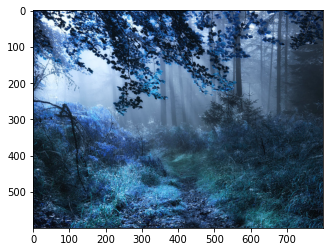

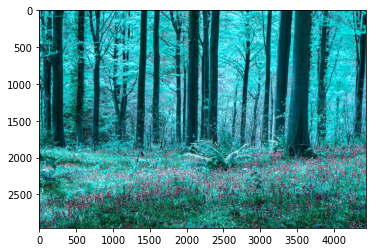

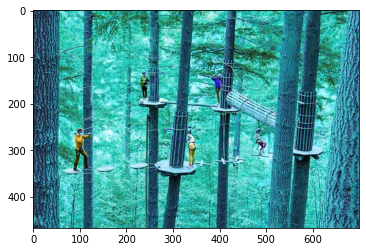

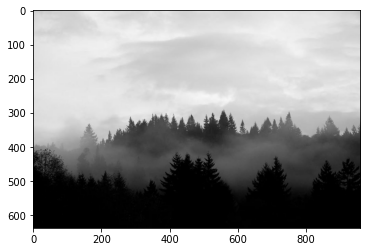

In [6]:
#Non-Fire Images
for img in os.listdir(non_fire_images_path)[:5]:
  img_array = cv2.imread(os.path.join(non_fire_images_path,img))
  plt.imshow(img_array)
  plt.show()

As we can see that the image shape and size are varying so we will try to standardize this

In [7]:
img_array.shape

(638, 960, 3)

In [33]:
data = []
IMG_SIZE = 300

def get_data(file_path,class_num, data):
    for img in os.listdir(file_path):
        try:
            img_array = cv2.imread(os.path.join(file_path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, class_num])
        except:
            pass
get_data(fire_images_path,1,data)
get_data(non_fire_images_path,0,data)

In [34]:
random.shuffle(data)

In [35]:
X = []
y = []

for i in data:
    X.append(i[0])
    y.append(i[1])

In [36]:
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE,3)
y = np.array(y)

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(798, 300, 300, 3)
(100, 300, 300, 3)
(100, 300, 300, 3)


## Model Building

We will use tensorflow and keras to build a simple CNN with the layers required

In [39]:
model = models.Sequential([
    
  layers.Conv2D(32, kernel_size = (3,3), padding='same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),

    
  layers.Flatten(),
  layers.Dense(60, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)      

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
25/25 [==============================] - 7s 261ms/step - loss: 2.3892 - accuracy: 0.7694 - val_loss: 0.1765 - val_accuracy: 0.9200
Epoch 2/20
25/25 [==============================] - 4s 178ms/step - loss: 0.1611 - accuracy: 0.9373 - val_loss: 0.1859 - val_accuracy: 0.9400
Epoch 3/20
25/25 [==============================] - 4s 179ms/step - loss: 0.0863 - accuracy: 0.9699 - val_loss: 0.1669 - val_accuracy: 0.9800
Epoch 4/20
25/25 [==============================] - 4s 178ms/step - loss: 0.1674 - accuracy: 0.9311 - val_loss: 0.4068 - val_accuracy: 0.9300
Epoch 5/20
25/25 [==============================] - 4s 178ms/step - loss: 0.1300 - accuracy: 0.9536 - val_loss: 0.0878 - val_accuracy: 0.9700
Epoch 6/20
25/25 [==============================] - 4s 178ms/step - loss: 0.0861 - accuracy: 0.9649 - val_loss: 0.0927 - val_accuracy: 0.9700
Epoch 7/20
25/25 [==============================] - 4s 177ms/step - loss: 0.0855 - accuracy: 0.9774 - val_loss: 0.0969 - val_accuracy: 0.9500
Epoch 

## Prediction & Evaluation


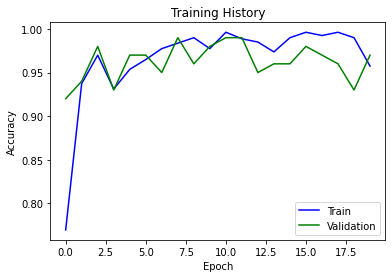

In [43]:
#visualize the training vs the validation accuracy of the model
plt.plot(history.history['accuracy'], c="b")
plt.plot(history.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [44]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 61ms/step - loss: 0.3819 - accuracy: 0.9100


[0.3818596601486206, 0.9100000262260437]

In [45]:
predictions = model.predict(X_test)

In [46]:
predicted= []
for i in predictions:
    if i >0.5:
        predicted.append(1)
    else:
        predicted.append(0)
predicted[:5]

[1, 1, 1, 0, 0]

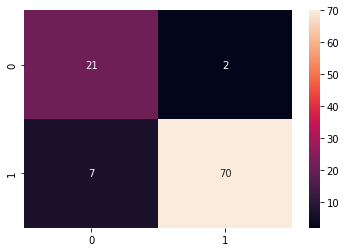

In [47]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)
sns.heatmap(cm,annot=True, fmt='d')

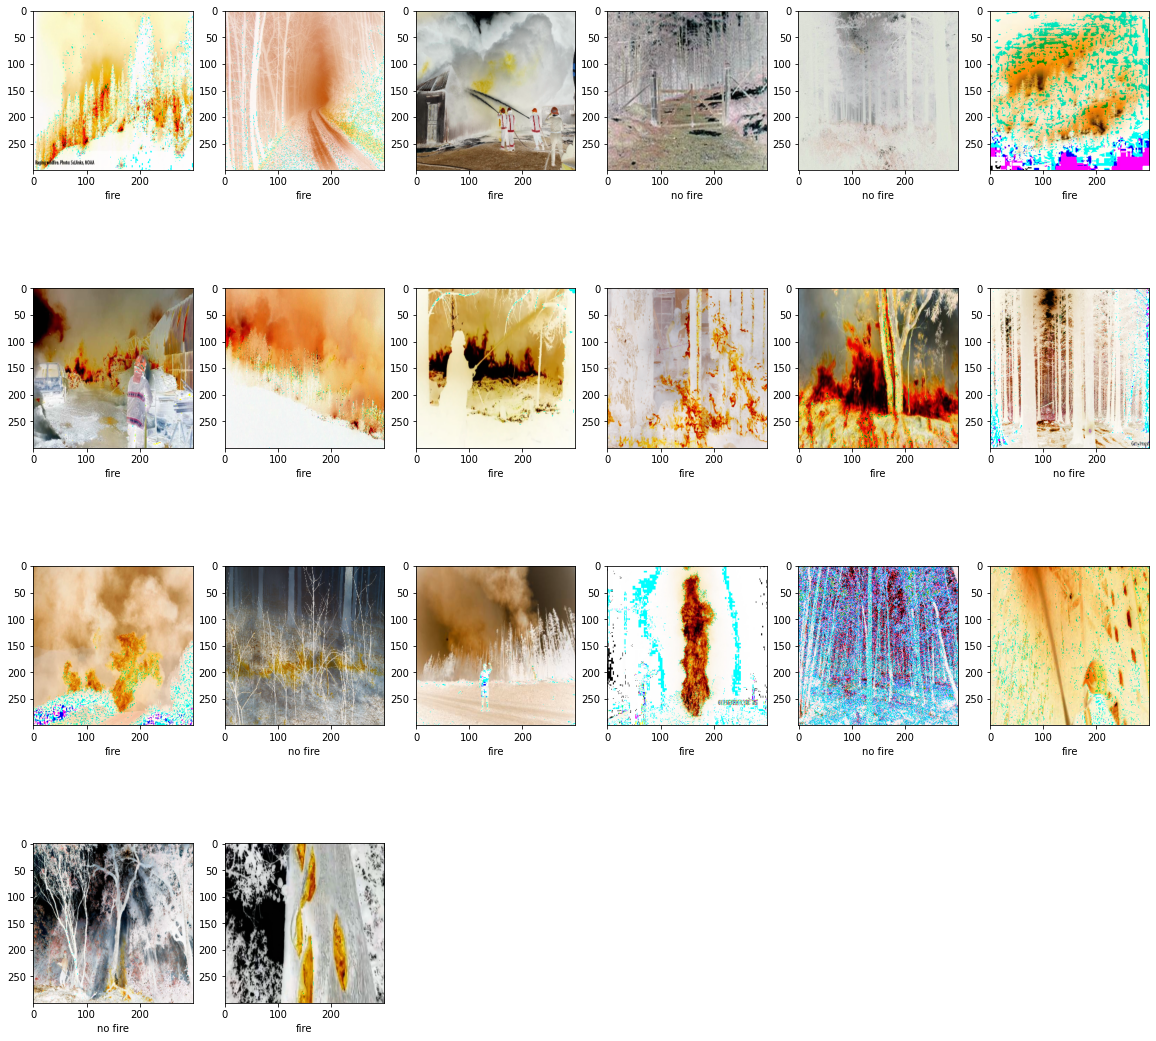

In [48]:
plt.figure(figsize=(20,40))

cat = ["no fire", "fire"]

for i in range(20):
    plt.subplot(8,6,i+1)
    plt.imshow((X_test[i] * 255).astype(np.uint8))
    plt.xlabel(cat[predicted[i]])